In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
%matplotlib inline

To what extent the current socio-economic status of a given region determine the development strategies of the region? To answer this question, we'll look into the UN sustainable development goals. The UN has about 17 elements for sustainable development goals associated with health, environment, education, poverty, diseases...etc. I'll work with the variables that represent the major elements in the UN goals for the sustainable development listed above. At the end, I'll develop the sustainable development index for different regions in the world. In order to develop, the sustainablity index, I'll incorporate different variables that contribute for the sustainable development positively and negatively. I'll group my variables in to two major catagories to determine two separate indexes. One for the positive impact index and the other for the negative impact index. For the final sustainablity index, I'll take the difference of two indexes. I mentioned some of the reasons how and why I treated the given variable in the corresponding cells for calculating the indexes below.

In [37]:
#Got this file from the World Bank website
suisdata = pd.read_csv('SDG_Data.csv')

In [38]:
#What it looks like
suisdata.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 30
0,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,75.463958,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,84.362348,NaN,86.280351,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,58.696062,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,71.984231,NaN,73.917807,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,91.847193,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,93.839661,NaN,95.156730,NaN,NaN,NaN,NaN
3,Arab World,ARB,Account at a financial institution (% age 15+)...,WP_time_01.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Account at a financial institution, female (% ...",WP_time_01.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
suisdata.columns

In [40]:
suisdata.rename(columns = {'Country Name': 'cname', 'Country Code': 'ccode', 'Indicator Name': 'indname', 'Indicator Code':'icode'}, inplace=True)

In [566]:
#Changed column names.
suisdata[(suisdata.cname=='United States')&(suisdata.indname=="Renewable energy consumption (% of total final energy consumption)")|
         ( suisdata.indname=="GDP per capita growth (annual %)")| (suisdata.indname=="CO2 emissions (kg per 2010 US$ of GDP)")]

,cname,ccode,indname,icode,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 30
40,Arab World,ARB,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,0.781258,0.832075,0.854846,0.902241,0.898884,0.838024,...,0.729724,0.752841,0.787329,0.784247,0.760353,0.774086,0.741836,NaN,NaN,NaN
112,Arab World,ARB,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,6.858537,-3.813850,3.178905,1.339937,0.791644,-0.210769,...,3.124307,3.743246,-0.887648,2.228455,1.064016,4.394129,0.798619,0.089354,0.922922,NaN
353,Caribbean small states,CSS,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,0.907267,1.023196,1.015849,0.885530,0.950654,0.984946,...,1.092963,1.063264,1.038038,1.103456,1.067156,1.030999,1.054764,NaN,NaN,NaN
425,Caribbean small states,CSS,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,0.977028,0.889535,-0.956235,2.064470,1.827143,2.105080,...,2.590845,0.728089,-4.189832,-0.448523,0.547687,0.606400,0.750551,0.746570,0.803174,NaN
666,Central Europe and the Baltics,CEB,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,1.240160,1.274455,1.232553,1.205149,1.086606,1.058152,...,0.594737,0.561983,0.530863,0.543777,0.528946,0.497514,0.477981,NaN,NaN,NaN
738,Central Europe and the Baltics,CEB,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,-9.367335,-1.496867,1.507970,4.187205,5.884260,...,6.949633,4.039005,-3.566066,2.344339,3.476997,0.772301,1.489144,2.988229,3.575499,NaN
979,Early-demographic dividend,EAR,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,0.761546,0.774889,0.765525,0.772290,0.777431,0.765478,...,0.723157,0.745035,0.765316,0.726886,0.726621,0.738510,0.693816,NaN,NaN,NaN
1051,Early-demographic dividend,EAR,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,3.015371,2.543842,2.308681,1.542078,0.994084,0.907874,...,4.806345,2.182518,-0.423274,4.929986,3.569028,2.558640,2.311531,2.176913,2.659031,NaN
1292,East Asia & Pacific,EAS,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,0.630162,0.629949,0.637269,0.649062,0.657778,0.668134,...,0.702080,0.707273,0.723044,0.753884,0.787357,0.772832,0.747830,NaN,NaN,NaN
1364,East Asia & Pacific,EAS,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,4.014897,3.009554,2.124164,2.368297,3.032723,3.446134,...,5.985940,2.871646,0.650733,6.563449,3.838411,4.026577,3.818448,3.300574,3.196531,NaN


In [60]:
#Separate data for different income groups
data4sd=suisdata[((suisdata.ccode=='LMC')| (suisdata.ccode=='LIC') |(suisdata.ccode=='HIC') |(suisdata.ccode=='LMY') |(suisdata.ccode=='MIC')|(suisdata.ccode=='UMC')|(suisdata.ccode=='WLD')) & ((suisdata.indname=="Renewable energy consumption (% of total final energy consumption)")|( suisdata.indname=="GDP per capita growth (annual %)") | (suisdata.indname=="CO2 emissions (kg per 2010 US$ of GDP)"))].head(25)

In [75]:
del data4sd['icode']

In [82]:
data4sd


,cname,indname,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 30
4422,High income,CO2 emissions (kg per 2010 US$ of GDP),0.393445,0.391888,0.388154,0.388621,0.381684,0.373809,0.373105,0.363505,...,0.304677,0.299740,0.293180,0.294539,0.284456,0.278270,0.275062,NaN,NaN,NaN
4494,High income,GDP per capita growth (annual %),2.371830,0.616980,1.452352,0.556189,2.464452,1.887469,2.235440,2.738144,...,1.918134,-0.468724,-4.084025,2.291484,1.216569,0.828977,0.462907,1.310556,1.347458,NaN
4631,High income,Renewable energy consumption (% of total final...,6.398540,6.590853,6.673236,6.597892,6.443424,6.749671,6.723192,6.749967,...,8.273854,8.749470,9.352007,9.636340,10.118319,10.362293,NaN,NaN,NaN,NaN
7865,Low & middle income,CO2 emissions (kg per 2010 US$ of GDP),1.069713,1.101391,1.134496,1.108152,1.073162,1.072212,1.052789,1.000809,...,0.894779,0.891496,0.892306,0.905156,0.921421,0.910581,0.872431,NaN,NaN,NaN
7937,Low & middle income,GDP per capita growth (annual %),0.181351,-0.658931,-1.016283,1.023101,0.725590,1.945985,3.099415,3.209306,...,7.202091,4.299936,0.986445,6.138696,4.569694,3.585216,3.489134,2.856491,2.218041,NaN
8074,Low & middle income,Renewable energy consumption (% of total final...,27.899370,28.102796,28.929169,29.252149,29.967602,29.691876,30.204899,30.355333,...,26.416847,26.199284,26.457359,25.844793,25.209237,24.610516,NaN,NaN,NaN,NaN
8178,Low income,CO2 emissions (kg per 2010 US$ of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.526285,0.541892,0.529519,0.518795,0.468833,0.495795,0.500804,NaN,NaN,NaN
8250,Low income,GDP per capita growth (annual %),-2.295124,-2.500075,-6.392453,-3.017167,-1.225750,1.020465,3.104189,0.700287,...,3.646949,2.409692,2.814291,3.862322,3.021381,1.382438,3.019016,3.182602,1.910806,NaN
8387,Low income,Renewable energy consumption (% of total final...,69.555036,71.515232,73.539660,74.675600,76.716215,77.479373,79.432930,80.176839,...,80.459538,79.422411,79.216252,79.011595,80.216895,80.626295,NaN,NaN,NaN,NaN
8491,Lower middle income,CO2 emissions (kg per 2010 US$ of GDP),1.015275,1.072470,1.138431,1.089053,1.025503,1.005782,0.999742,0.970030,...,0.826863,0.847103,0.840730,0.797886,0.820126,0.824838,0.754808,NaN,NaN,NaN


In [169]:
grouped = data4sd.groupby(['cname', 'indname']).first()

In [170]:
#del grouped['Unnamed: 30']
grouped.fillna(0.0)

1990  \
cname               indname                                                         
High income         CO2 emissions (kg per 2010 US$ of GDP)               0.393445   
                    GDP per capita growth (annual %)                     2.371830   
                    Renewable energy consumption (% of total final ...   6.398540   
Low & middle income CO2 emissions (kg per 2010 US$ of GDP)               1.069713   
                    GDP per capita growth (annual %)                     0.181351   
                    Renewable energy consumption (% of total final ...  27.899370   
Low income          CO2 emissions (kg per 2010 US$ of GDP)               0.000000   
                    GDP per capita growth (annual %)                    -2.295124   
                    Renewable energy consumption (% of total final ...  69.555036   
Lower middle income CO2 emissions (kg per 2010 US$ of GDP)               1.015275   
                    GDP per capita growth (annual %)                     1.866830   
                    Renewable energy consumption (% of total final ...  44.635327   
Middle income       CO2 emissions (kg per 2010 US$ of GDP)               1.075622   
                    GDP per capita growth (annual %)                     0.272403   
                    Renewable energy consumption (% of total final ...  26.183352   
Upper middle income CO2 emissions (kg per 2010 US$ of GDP)               1.091819   
                    GDP per capita growth (annual %)                     0.088294   
                    Renewable energy consumption (% of total final ...  18.916953   
World               CO2 emissions (kg per 2010 US$ of GDP)               0.593306   
                    GDP per capita growth (annual %)                     1.190598   
                    Renewable energy consumption (% of total final ...  16.618315   

                                                                             1991  \
cname               indname                                                         
High income         CO2 emissions (kg per 2010 US$ of GDP)               0.391888   
                    GDP per capita growth (annual %)                     0.616980   
                    Renewable energy consumption (% of total final ...   6.590853   
Low & middle income CO2 emissions (kg per 2010 US$ of GDP)               1.101391   
                    GDP per capita growth (annual %)                    -0.658931   
                    Renewable energy consumption (% of total final ...  28.102796   
Low income          CO2 emissions (kg per 2010 US$ of GDP)               0.000000   
                    GDP per capita growth (annual %)                    -2.500075   
                    Renewable energy consumption (% of total final ...  71.515232   
Lower middle income CO2 emissions (kg per 2010 US$ of GDP)               1.072470   
                    GDP per capita growth (annual %)                    -0.567275   
                    Renewable energy consumption (% of total final ...  44.621749   
Middle income       CO2 emissions (kg per 2010 US$ of GDP)               1.107677   
                    GDP per capita growth (annual %)                    -0.567409   
                    Renewable energy consumption (% of total final ...  26.323251   
Upper middle income CO2 emissions (kg per 2010 US$ of GDP)               1.117031   
                    GDP per capita growth (annual %)                    -0.318760   
                    Renewable energy consumption (% of total final ...  18.998839   
World               CO2 emissions (kg per 2010 US$ of GDP)               0.592544   
                    GDP per capita growth (annual %)                    -0.280685   
                    Renewable energy consumption (% of total final ...  16.771592   

                                                                             1992  \
cname               indname                                                     

In [171]:
#Since the values are closer to each other, and the sustainable development (SD) and understanding SD depends on the lenght of different periods,
#I'm going to determine the average value and compare it with each year on the data set.
grouped['avg']=(grouped['1998']+ grouped['1999']+ grouped['2000'] + grouped['2001'] + grouped['2002']+grouped['2003']+grouped['2004']+grouped['2005']+grouped['2006']+grouped['2007']+grouped['2008']+grouped['2009']+grouped['2010']+grouped['2011']+grouped['2012'])/15
grouped                       

1990  \
cname               indname                                                         
High income         CO2 emissions (kg per 2010 US$ of GDP)               0.393445   
                    GDP per capita growth (annual %)                     2.371830   
                    Renewable energy consumption (% of total final ...   6.398540   
Low & middle income CO2 emissions (kg per 2010 US$ of GDP)               1.069713   
                    GDP per capita growth (annual %)                     0.181351   
                    Renewable energy consumption (% of total final ...  27.899370   
Low income          CO2 emissions (kg per 2010 US$ of GDP)                    NaN   
                    GDP per capita growth (annual %)                    -2.295124   
                    Renewable energy consumption (% of total final ...  69.555036   
Lower middle income CO2 emissions (kg per 2010 US$ of GDP)               1.015275   
                    GDP per capita growth (annual %)                     1.866830   
                    Renewable energy consumption (% of total final ...  44.635327   
Middle income       CO2 emissions (kg per 2010 US$ of GDP)               1.075622   
                    GDP per capita growth (annual %)                     0.272403   
                    Renewable energy consumption (% of total final ...  26.183352   
Upper middle income CO2 emissions (kg per 2010 US$ of GDP)               1.091819   
                    GDP per capita growth (annual %)                     0.088294   
                    Renewable energy consumption (% of total final ...  18.916953   
World               CO2 emissions (kg per 2010 US$ of GDP)               0.593306   
                    GDP per capita growth (annual %)                     1.190598   
                    Renewable energy consumption (% of total final ...  16.618315   

                                                                             1991  \
cname               indname                                                         
High income         CO2 emissions (kg per 2010 US$ of GDP)               0.391888   
                    GDP per capita growth (annual %)                     0.616980   
                    Renewable energy consumption (% of total final ...   6.590853   
Low & middle income CO2 emissions (kg per 2010 US$ of GDP)               1.101391   
                    GDP per capita growth (annual %)                    -0.658931   
                    Renewable energy consumption (% of total final ...  28.102796   
Low income          CO2 emissions (kg per 2010 US$ of GDP)                    NaN   
                    GDP per capita growth (annual %)                    -2.500075   
                    Renewable energy consumption (% of total final ...  71.515232   
Lower middle income CO2 emissions (kg per 2010 US$ of GDP)               1.072470   
                    GDP per capita growth (annual %)                    -0.567275   
                    Renewable energy consumption (% of total final ...  44.621749   
Middle income       CO2 emissions (kg per 2010 US$ of GDP)               1.107677   
                    GDP per capita growth (annual %)                    -0.567409   
                    Renewable energy consumption (% of total final ...  26.323251   
Upper middle income CO2 emissions (kg per 2010 US$ of GDP)               1.117031   
                    GDP per capita growth (annual %)                    -0.318760   
                    Renewable energy consumption (% of total final ...  18.998839   
World               CO2 emissions (kg per 2010 US$ of GDP)               0.592544   
                    GDP per capita growth (annual %)                    -0.280685   
                    Renewable energy consumption (% of total final ...  16.771592   

                                                                             1992  \
cname               indname                                                     

In [561]:
#grouped[['2001', '2002', '2005', '2011', '2012']].plot(kind='barh')

In [562]:
#grouped[['avg', '2012']].plot(kind='barh')
#plt.title('Suistanable Development With Respect to Socio-economic Status')
#plt.xlabel('Indicators value')


"Aquaculture production (metric tons)"
"Children out of school (% of primary school age)"
"Forest area (% of land area)"
"Marine protected areas (% of territorial waters)"
'Terrestrial and marine protected areas (% of total territorial area)')
"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)"

These are some of the variables I'll use to determine sustainablity index for different regions across the globe.


In [227]:
#Here are the variables for determining the index for SD.
s4index=suisdata[((suisdata.ccode=='LMC')| 
          (suisdata.ccode=='LIC') |(suisdata.ccode=='ARB')
          |(suisdata.ccode=='CSS') |(suisdata.ccode=='CEB')|
          (suisdata.ccode=='EAS')|(suisdata.ccode=='WLD')|(suisdata.ccode=='EMU')| (suisdata.ccode=='ECS') |(suisdata.ccode=='EUU') |(suisdata.ccode=='LCN') |(suisdata.ccode=='MEA')|(suisdata.ccode=='SAS') |(suisdata.ccode=='SSF') |(suisdata.ccode=='NAC')) & ((suisdata.indname=="Renewable energy consumption (% of total final energy consumption)")|( suisdata.indname=="GDP per capita growth (annual %)") |(suisdata.indname=="CO2 emissions (kg per 2010 US$ of GDP)")|(suisdata.indname=="Aquaculture production (metric tons)") |(suisdata.indname=="Children out of school (% of primary school age)") |(suisdata.indname=="Forest area (% of land area)")|(suisdata.indname=="Marine protected areas (% of territorial waters)")|
          (suisdata.indname=='Prevalence of HIV, total (% of population ages 15-49)')|(suisdata.indname=='Urban population growth (annual %)')|(suisdata.indname=='Terrestrial and marine protected areas (% of total territorial area)'))]

In [273]:
#Since most of the variables I wanted to include for the sustainable development are in the 'NAN' format, I've to focus on the two
#major elements that play a substential role in understanding the sustainable development by positively contributing for the UN goal
posimpact = s4index[
                    (suisdata.indname=="Renewable energy consumption (% of total final energy consumption)") |
                    (suisdata.indname=="Forest area (% of land area)")]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [274]:
del posimpact['ccode']

In [275]:
grouped=posimpact.groupby(['cname','indname']).first()
grouped['avg']=(grouped['1998']+ grouped['1999']+ grouped['2000'] + grouped['2001'] + grouped['2002']+grouped['2003']+grouped['2004']+grouped['2005']+grouped['2006']+grouped['2007']+grouped['2008']+grouped['2009']+grouped['2010']+grouped['2011']+grouped['2012'])/15

In [393]:
#Here I'm calculating each variable contribution for the sustainable development. Since I've two variables that positively contribute for
#SD, I'm taking 50% of each variable to normalize them
#For this index, I take the sum to understand the combined effect of the variables in this section
grouped['adj']=grouped['avg'] * 0.5

index2=grouped[['adj']]
index2table=pd.concat((index2.reset_index(),
                 index2.reset_index().groupby('cname').aggregate('sum').reset_index())).\
                      sort(['cname','indname']).\
                      fillna('index2').\
                      set_index(['cname','indname'])

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [394]:
index2table

adj
cname                          indname                                                      
Arab World                     Forest area (% of land area)                         1.695996
                               Renewable energy consumption (% of total final ...   3.316615
                               index2                                               5.012611
Caribbean small states         Forest area (% of land area)                        42.751904
                               Renewable energy consumption (% of total final ...   4.823241
                               index2                                              47.575145
Central Europe and the Baltics Forest area (% of land area)                        16.561795
                               Renewable energy consumption (% of total final ...   5.400576
                               index2                                              21.962371
East Asia & Pacific            Forest area (% of land area)                        12.993317
                               Renewable energy consumption (% of total final ...   9.986780
                               index2                                              22.980097
Euro area                      Forest area (% of land area)                        18.563235
                               Renewable energy consumption (% of total final ...   4.722081
                               index2                                              23.285316
Europe & Central Asia          Forest area (% of land area)                        18.835227
                               Renewable energy consumption (% of total final ...   4.343988
                               index2                                              23.179215
European Union                 Forest area (% of land area)                        18.500271
                               Renewable energy consumption (% of total final ...   4.798257
                               index2                                              23.298528
Latin America & Caribbean      Forest area (% of land area)                        23.909732
                               Renewable energy consumption (% of total final ...  14.311779
                               index2                                              38.221510
Low income                     Forest area (% of land area)                        14.493554
                               Renewable energy consumption (% of total final ...  39.777897
                               index2                                              54.271451
Lower middle income            Forest area (% of land area)                        12.741978
                               Renewable energy consumption (% of total final ...  21.952018
                               index2                                              34.693996
Middle East & North Africa     Forest area (% of land area)                         0.978378
                               Renewable energy consumption (% of total final ...   1.150647
                               index2                                               2.129025
North America                  Forest area (% of land area)                        17.897453
                               Renewable energy consumption (% of total final ...   3.903899
                               index2                                              21.801353
South Asia                     Forest area (% of land area)                         8.474071
                               Renewable energy consumption (% of total final ...  24.417351
                               index2                                              32.891422
Sub-Saharan Africa             Forest area (% of land area)                        13.646479
                               Renewable energy consumption (% of total final ...  35.795182
                               index2                                              49.4416

In [265]:
#Variables that negatively contribute for the sustainable development
negimpact = s4index[(s4index.indname=='Prevalence of HIV, total (% of population ages 15-49)') | 
                    (s4index.indname=='Urban population growth (annual %)') | 
                    (suisdata.indname=="CO2 emissions (kg per 2010 US$ of GDP)")|
                    (suisdata.indname=="Children out of school (% of primary school age)")]
                    

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [268]:
grouped2= negimpact.groupby(['cname', 'indname']).first()
grouped2['avg'] = (grouped2['1998']+ grouped2['1999']+ grouped2['2000'] + grouped2['2001'] + grouped2['2002']+grouped2['2003']+grouped2['2004']+grouped2['2005']+grouped2['2006']+grouped2['2007']+grouped2['2008']+grouped2['2009']+grouped2['2010']+grouped2['2011']+grouped2['2012'])/15

In [395]:
#Let's normalize values by finding their fair-share for the sustainable development, and we call it
#an adjusted value.
grouped2['adj'] = grouped2['avg']*0.25
#index=grouped2[['adj']]

index1=grouped2[['adj']].fillna(0.0)
index1table=pd.concat((index1.reset_index(),
                 index1.reset_index().groupby('cname').aggregate('sum').reset_index())).\
                      sort(['cname','indname']).\
                      fillna('index1').\
                      set_index(['cname','indname'])

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [396]:
index1table

adj
cname                          indname                                                      
Arab World                     CO2 emissions (kg per 2010 US$ of GDP)               0.194249
                               Children out of school (% of primary school age)     4.518717
                               Prevalence of HIV, total (% of population ages ...   0.035416
                               Urban population growth (annual %)                   0.708538
                               index1                                               5.456920
Caribbean small states         CO2 emissions (kg per 2010 US$ of GDP)               0.248397
                               Children out of school (% of primary school age)     1.659768
                               Prevalence of HIV, total (% of population ages ...   0.408818
                               Urban population growth (annual %)                   0.201563
                               index1                                               2.518546
Central Europe and the Baltics CO2 emissions (kg per 2010 US$ of GDP)               0.165856
                               Children out of school (% of primary school age)     0.989297
                               Prevalence of HIV, total (% of population ages ...   0.000000
                               Urban population growth (annual %)                  -0.073234
                               index1                                               1.081918
East Asia & Pacific            CO2 emissions (kg per 2010 US$ of GDP)               0.171758
                               Children out of school (% of primary school age)     1.230061
                               Prevalence of HIV, total (% of population ages ...   0.000000
                               Urban population growth (annual %)                   0.752798
                               index1                                               2.154618
Euro area                      CO2 emissions (kg per 2010 US$ of GDP)               0.054704
                               Children out of school (% of primary school age)     0.258854
                               Prevalence of HIV, total (% of population ages ...   0.000000
                               Urban population growth (annual %)                   0.160913
                               index1                                               0.474470
Europe & Central Asia          CO2 emissions (kg per 2010 US$ of GDP)               0.087512
                               Children out of school (% of primary school age)     0.777252
                               Prevalence of HIV, total (% of population ages ...   0.000000
                               Urban population growth (annual %)                   0.123856
                               index1                                               0.988620
...                                                                                      ...
Lower middle income            CO2 emissions (kg per 2010 US$ of GDP)               0.220737
                               Children out of school (% of primary school age)     3.494490
                               Prevalence of HIV, total (% of population ages ...   0.000000
                               Urban population growth (annual %)                   0.692549
                               index1                                               4.407776
Middle East & North Africa     CO2 emissions (kg per 2010 US$ of GDP)               0.209401
                               Children out of school (% of primary school age)     2.252642
                               Prevalence of HIV, total (% of population ages ...   0.026690
                               Urban population growth (annual %)                   0.670603
                               index1                                               3.159337
North America                  CO2 emissions (kg per 2010 US$ of GDP)               0.0991

In [567]:
#index1table.head(20).plot(kind='barh')

In [520]:
mergein12 = pd.merge(index1table.reset_index(), index2table.reset_index(),
                     how='outer').set_index(['cname'])

In [577]:
#mergein12[['adj_x']].drop_duplicates()
                                  
df1=mergein12[(mergein12.indname=='index1')]
df1.rename(columns={'adj':'index1val'})

,indname,index1val
cname,,
Arab World,index1,5.456920
Caribbean small states,index1,2.518546
Central Europe and the Baltics,index1,1.081918
East Asia & Pacific,index1,2.154618
Euro area,index1,0.474470
Europe & Central Asia,index1,0.988620
European Union,index1,0.576953
Latin America & Caribbean,index1,2.044960
Low income,index1,8.735674


In [532]:
df2=mergein12[(mergein12.indname=='index2')]

In [537]:
mergein1 = pd.merge(df1.reset_index(),df2.reset_index(), on='cname',
                     how='inner').set_index(['cname'])

In [509]:
mergein1 = pd.merge(index2table.reset_index(),index1table.reset_index(), 
                     how='left').set_index(['cname'])

In [517]:
mergein1

,indname,adj
cname,,
Arab World,Forest area (% of land area),1.695996
Arab World,Renewable energy consumption (% of total final...,3.316615
Arab World,index2,5.012611
Caribbean small states,Forest area (% of land area),42.751904
Caribbean small states,Renewable energy consumption (% of total final...,4.823241
Caribbean small states,index2,47.575145
Central Europe and the Baltics,Forest area (% of land area),16.561795
Central Europe and the Baltics,Renewable energy consumption (% of total final...,5.400576
Central Europe and the Baltics,index2,21.962371


In [576]:
mergein12[mergein12.indname=='index2'].rename(columns={'adj':'index2val'})

,indname,index2val
cname,,
Arab World,index2,5.012611
Caribbean small states,index2,47.575145
Central Europe and the Baltics,index2,21.962371
East Asia & Pacific,index2,22.980097
Euro area,index2,23.285316
Europe & Central Asia,index2,23.179215
European Union,index2,23.298528
Latin America & Caribbean,index2,38.221510
Low income,index2,54.271451


In [571]:
Finalindex=mergein1.drop([mergein1.index[0],mergein1.index[10]])
Finalindex[['sustainindex']].sort()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


,sustainindex
cname,
Caribbean small states,45.056599
Central Europe and the Baltics,20.880452
East Asia & Pacific,20.825479
Euro area,22.810846
Europe & Central Asia,22.190596
European Union,22.721575
Latin America & Caribbean,36.176551
Low income,45.535777
Lower middle income,30.286220


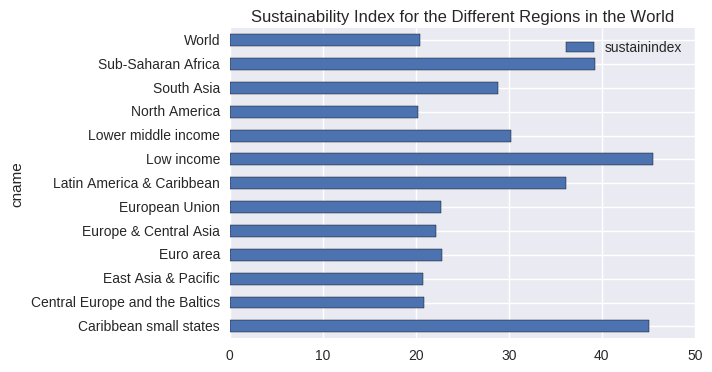

In [579]:
#The final result for the SD index is determined throught taking the difference between the factors that bring positive impact for the 
#SD and those that bring the negative impact for SD
mergein1['sustainindex'] = mergein1['adj_y']- mergein1['adj_x']

Finalindex[['sustainindex']].plot(kind='barh')
plt.title('Sustainability Index for the Different Regions in the World')

Even though my calculation for the sustainability index is based on a very few variables, what we can understand from the graph above is that the developing countries tend to use more sustaianble energy sources, which might deplete the available natural resources in the long run. On the other hand, the developed countries tend to contribute a significant portion for the carbon emission across the globe by using less sustainable energy sources, which also needs to be addressed to maintain the sustainable development.